# Khai báo & cài đặt

In [ ]:
from google.colab import userdata
import os
os.environ["GEMINI_API_KEY"] = userdata.get('GEMINI_API_KEY')

In [ ]:
!pip -q install google-genai

# Thử nghiệm Text Generation

In [ ]:
import base64
import os
from google import genai
from google.genai import types


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text="Hãy kể cho tôi một câu chuyện cười có mèo và chuột."),
            ],
        ),
    ]
    tools = [
        types.Tool(googleSearch=types.GoogleSearch(
        )),
    ]
    generate_content_config = types.GenerateContentConfig(
        tools=tools,
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")

if __name__ == "__main__":
    generate()


Chắc chắn rồi, đây là một câu chuyện cười về mèo và chuột:

Tại sao mèo không chơi poker trong rừng? Vì luôn có một con chuột trong nhà!


# Thử nghiệm Image Generation

In [ ]:
import base64
import mimetypes
import os
from google import genai
from google.genai import types


def save_binary_file(file_name, data):
    f = open(file_name, "wb")
    f.write(data)
    f.close()
    print(f"File saved to to: {file_name}")


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    model = "gemini-2.0-flash-preview-image-generation"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text="Tạo ảnh một con mèo nằm dưới nắng ngủ trưa."),
            ],
        ),
    ]
    generate_content_config = types.GenerateContentConfig(
        response_modalities=[
            "IMAGE",
            "TEXT",
        ],
        response_mime_type="text/plain",
    )

    file_index = 0
    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        if (
            chunk.candidates is None
            or chunk.candidates[0].content is None
            or chunk.candidates[0].content.parts is None
        ):
            continue
        if chunk.candidates[0].content.parts[0].inline_data and chunk.candidates[0].content.parts[0].inline_data.data:
            file_name = f"IMG_{file_index}"
            file_index += 1
            inline_data = chunk.candidates[0].content.parts[0].inline_data
            data_buffer = inline_data.data
            file_extension = mimetypes.guess_extension(inline_data.mime_type)
            save_binary_file(f"{file_name}{file_extension}", data_buffer)
            # Show file
            from IPython.display import Image
            Image(f"{file_name}{file_extension}")
        else:
            print(chunk.text)

if __name__ == "__main__":
    generate()



Tôi
 sẽ tạo một hình ảnh một chú mèo mướp đang cuộn tròn ngủ
 say sưa dưới ánh nắng mặt trời dịu nhẹ, với những vệt nắng vàng ấm áp trải dài trên bộ lông của chú, tạo cảm giác bình yên và thư thái.


File saved to to: IMG_0.png


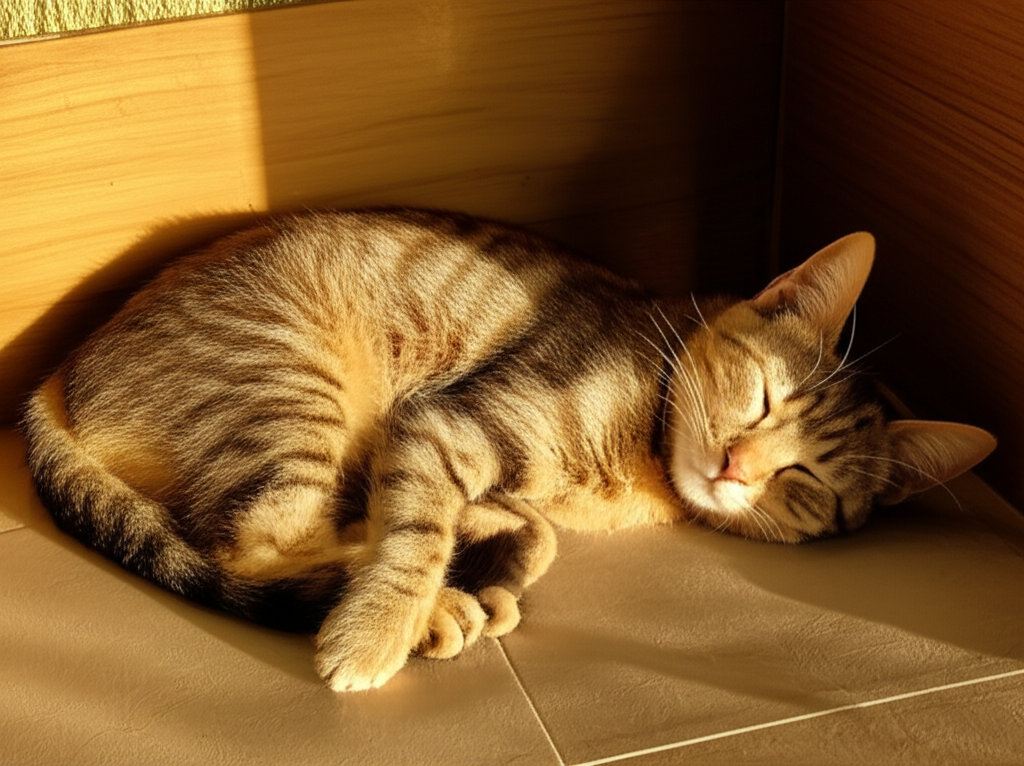

In [ ]:
from IPython.display import Image
Image(f"IMG_0.png")

# OCR - Nhận diện ký tự trong hoá đơn

In [ ]:
# To run this code you need to install the following dependencies:
# pip install google-genai

import base64
import os
from google import genai
from google.genai import types


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_bytes(
                    mime_type="image/png",
                    data=base64.b64decode(
                        """iVBORw0KGgoAAAANSUhEUgAAAg4AAALfCAYAAAAJ2UqzAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAGQpSURBVHhe7Z29rizJcp35BIJeQBZNOfLl0KOgB6BwPTkSwAE9ETKEAQkaMgjwQJBDTxjIIgHKGIuOLGJc6gUGoCNPT3E0a+as4brBrOrovav3qcz8PiDRWfkfUZkR0dW9e//OZwAAAIAmBA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2twwc/tW/+leff+d3fof0ziQ9AgAAXMktAwc5PXg/6BEAAK6GwGFh0CMAAFwNgcPCoEcAALgaAoeFQY8AAHA1BA4Lgx4BAOBqCBwWBj0CAMDVEDgsDHoEAICrIXBYGPQIAABXQ+CwMOgRAACuhsBhYdAjAABcDYHDwqBHAAC4GgKHhUGPAABwNQQOC2M9/v7v//7PeSXlK4/q//AP//DX+t/93d/9UvqPPKr/8z//81/rlSqP6v/qr/7qt+r/4R/+4UvNLzyq/+GHH36rXtfJo3qNl/WaL3lUL7Je8lYe1Uuvrpe+K4/q2QPsAfbA+nvgo/ind+cGSCnwftAjAABcDYHDwqBHAAC4GgKHhUGPAABwNQQOC4MeAQDgaggcFgY9AgDA1RA4LAx6BACAqyFwWBj0CAAAV0PgsDDoEQAArobAYWHQIwAAXA2Bw8KgRwAAuBoCh4VBjwAAcDUEDguDHgEA4GoIHBYGPQIAwNUQOCwMegQAgKshcFgY9AgAAFdD4LAwO+nxD/7gDz7/3u/93ue/+Zu/+VICAACvgMBhYXbRowKGP/qjP/r8Z3/2Zz/n//Iv//JLDQAAXA2Bw8KgRwAAuBoCh4WZXY96cqAnCDX9+OOPX1oct0n+7u/+blgu9NGGyvW0Isk+mWo7ofWM2jr9h//wH35+rX09t56WJI/G0ziWu/YVfvLij23URteSKbGMXpfHHD2xUbk+Dhrh9eZaLJuSyPwz9+O9axqlqgczajua17jNkV6VKlfJJzxHTb7vj/DHe5l8D12XZ014/aP1Wu6zujN5HuE1jeRTuZLIe1/X73V0z9zZ/d8ZAoeFmVmPNhJnB9cOsbbxobdBT0Nug22qIRfKq6waF7WtZZUjw+S1piGzjGccjSeZVa5UDanX73LPbX0Yj/1eJ2aj6zVap7lmXSuJZ+7He9dU662LnDfXk3juqnvhddaxxEfIJzxHonFV5jXXeyNyfbkfE+/NWu/1j9Yr1G+0Zq9L/X0Pcuy6F0d4TUqVLLfMSvXeeZ4s9z040zX8NgQOCzOrHtPIHOHDPjI0Nhw2BGko67jVkNfrZxkZJlENo+c5MsDmaDzL75RGuOrPhlpjJXVNHnO0JpUfGVbrW/N4zNpWZUrCbZzO7sd71zSqr/pQXil1aKoujcbVOHpVffIR8gmPX8k1570xR/0Sy1V14vWP1issj3Vrck7rP8e2zqyXEV6TUsojXC4ss1Ou1fO4f72GHgQOCzOrHnWQzwymODJsxsZThiGNkvuZashHRu0ZzgxRjl3XccTReOlwan06DuF5NVaSehE5ZkXlR/fEhtoyKVWy/Jn7ccWaKjlHna/icVK/Xr/6en3WtfgI+YTqc2zj+bXmun7PP5ov8brVP3nU3/OlPqvM3o85dt2LI7ymkc51rSRS5jpX6kZoPl2rHPoQOCzMjHqsB/sItVE6Io1LGqU0KqIaNeWV3srZ+l3n9Mh4i6PxUj7L4PFsDG1Y1VfXR8mye8yjdOTErFOnEVn3zP1475pG9alTj2/djajjWL+irl98hHzCbSope53fa/feOEJ9Pf4onelLc6mN8bX0ktdam0mdHeE1iTqG8q6rMitvPea9Fx4z1wKPIXBYmJkDhzMDItRG6QgbZBnIOqaNt9pUQ668jYxwX6esG1ENU8UGT6nD0Xgpn7BDUHvnXec5VZd4bMvuMUdOQeVHsttQO3nexHWiznt2P967plF96vRsfFPH0bXXJ6xfO5+PkE+oXqmSsjvv/aN5dV33QkV91c4ymZTlCLfR6+g+VH2JqrMRXpPJcZV3XZU5x857L+qY0IPAYWFm1OPI0Izwga+GzaSBHBklGy8bbtedjavyR+uqhqlSHccjjsbzujWe8fosu+ssq8ZKql7e6sR8zzSO9VfnUpmSqPOKo/vx3jWN6n0PNOaj++FxrH+3HyWv8SPkE6pXquT8df1n8yW+j/UcpO7O8Pyj+ayLHHuks4rXZHItenVdlVlo3GzrOq+l7lc4h8BhYWbVY+cwjwySseGw0T0ySipzct3ZuCo/M+TCc6XRSh45qsrReF6nxjNu6+S6I31WvbxVduvb4yivlI7BZaLOa9wm6967plG9ylTn9SmvNELrUF3VZcomVOa5PkI+4bEqeb+tB++fM70kVUcmnfUZ1pvHSVyXY1tnZ+OejeUkqszG/bPu2fMIv0DgsDCz6tEHX6karsSGIJ2ncF8ZI3FkyG00at3ZuKo7w3NVo2WeNVRH49nh1DWmIXWd+ura+jBVL291Yr5fHifvn8nrZ+7He9dU60f31vPWtp7buveYo3trvUu2j5BPeKzE99rjjdZc5RphPal/YhlG602sA6Wqh5F+vO46X+I1VTyP647uU64p6zz3I5ngHyFwWJjZ9WhDUVNig33W5siQC/evdUfjaqwzPNeRUbbhHa1lxNF4Nv7pAI315jobxrr2qhePOTKgKj9yYjbUKZPHVsp81o10YL1ftaZRGjmno/Y5r9c2Wovvq3T9EfIJ1Y+S5jcdJ5rJ6/IeqrrqBg7CY+R6zGj+0X1JPF4lxxJHMgvr++g81TQ6X0DgsDToEQAArobAYWHQI8DenL37vgN6inD2VAXuCYHDwqBHgL0hcIBXQOCwMOgRAACuhsBhYdAjAABcDYHDwqBHAAC4GgKHhUGPAABwNQQOC4MeAQDgaggcFgY9AgDA1RA4LAx6BACAqyFwWBj0CAAAV0PgsDA76FG/rT/6nwD60Rv/Rr5/X19J1N/JP/txHP+ATm2XY+bv2auNyxOV1x+6ybFThhwjf+ffZUfrzTGUd3vNY47W1yX7e9wjHbm8838NAGAeCBwWZgc9ylFVRypHrjI7XdfLkWVbOdd0qiPU3m3kAO0EcxznNa+DCPVJR17nFhlIqK3Wq/EzEHGbXGvOYzS25/M4xvPm2GqT6+ugvh5Xa/HaNP5IRyqrawGA+SFwWJhdAod0iMLOy2XKO4hI0hnrNd9Fm+rs00kaO9B0kiPHnGNpjKzXWt0/ZXGfnLO20bXG8ng5tvIeo8pS1/cItc91+LqOm9cEDgDrQeCwMLsEDuko5ajkVJXSYandyHGmI6zkuCbH0BwKNqoTr4/szajMZJ3yGqOOLerYklfXda1eW/14xDySfURdv2T967/+61MdETgArAeBw8LsoEc7LTsrX48clp2s6TjP6izrtdA4ctR69ZyaS447GfXV/LWdqGtNsk59M2l+JevB46ec6lsDElHHUtJcpurL13Wdea3+BA4Aa0HgsDCr61FOy05JjtDOW6hO+eqAM18d4Qi1dxs7Zc2TztBl2VbUd/s5t5FzHlHLcyzNobHS+VteYblNrkt12e8ZUm6N9+g7DoLAAWA9CBwWZnU9yinZCcpx1XfIdtRyXI/eQbu/r43LldLxq6/L7bCzrVJ10NlfddlWyQ5W7XKdQtfZtqK5vQ6RbT1ulikdfYxxhtbm/tbVkY6E1k3gALAWBA4Lgx4BAOBqCBwWBj0CAMDVEDgsDHoEAICrIXBYGPQIAABXQ+CwMOgRAACuhsBhYdAjAABcDYHDwuyux/wTxfpngq9Ec878J4haf/5p5wzoz1vf8uelV+M/m/0oJHP9s1+AV0PgsDCr61HOuTo4/6aAUb2ur3bkjwKRVwYqksW/m3AkV8ehqF7JOtOrf3dBetP1e8ngLXnW0V+p707b1LGSf1fjPeuQzB7HuP1bfu9C7TXmM7IDXAGBw8LsoEc5n3RwclIypq+mY6yrk7ia9zoM6enVujoKHJ7lkazPBDkdvckp5/1zkPOedUjXDtCMx3tL4ADwtSBwWJgd9ChjmwZXhtnIQOe7RjkwOwMZbCXXjZy86uUw3CadbO2fzsBl2Uf1mj/rzGidI4cuOd1Gec0v7JDcV+g112RSHo3heUZjuU5j5dpT30kdW1jurMvyRPcg57GzFkf6Hunu0T1WWerySNe5J7yWo74qT+q1UFv3NW6nuXJcz1f1lNepU+tD443KAa6EwGFhdtGjDKSQ4VUy6XiE2tkZqM5GX8Z1ZOir4VUb98+x9JrGfNRHZTmenYjw+k2uzeg6HYj6jtbsMrXNdYhcv8h53C/HzLFy7qpXUcdWe419JLeuc0yh/qkLtfP6zvSdZLuUT/OljGf7RKheYzl5zKO+HtvUa6G1KGms2k9lmsdY9qqnkd48rsi16rW2BbgCAoeF2UWPMo4ynDLGdlAjAytjnA4gGRn6Wqa+dhqj/qM51efMAeSYJh2BURvLZrwGjZFOTmjs2r6uLefxWDnO0Vijsas+jOU0vq7louriLfpWe/UToz75auq1yHGSo751HfVapL71qjbufyZ7jiWZUye+T1mW1GuAKyBwWJhd9ChjKuNZjXV9J6k2j5xKovYa26jNo/4ZvAj3qU4ur+s6dW0HY+xojK49p8o9p8fKMpPrF7r2PLn+Sh2rM7baaOyUU/i6lgv1P3KeXp85Wm/nHh+VJ5o35TFHfS2vkGwjParebYTm0HrFmexuI1SmlPrTmG7bkQ3gvRA4LMxOepSBrIZexlVG10mG9pFTSVQmB+D+afTP+uec6UzSUeZ1XaecwMhpqdxt1Ndzag6XnwUOIuVRG69vNJbL6lidse3IUk7h61ouzpznkb41judU0piP7vFReXJ0D8765jpGfaVb69tYB2eyj+6vsL71+khPAFdC4LAw6PF9fITRleNLZyA0r8oBAO4IgcPCoMf38VHv1uq75vqutIPeoV61Xs1fnwbAPdE9Hz3dAHglBA4Lgx4BAOBqCBwWBj0CAMDVEDgsDHoEAICrIXBYGPQIAABXQ+CwMOjx9ehLhPpC49fAX6rkLzCuQV8y/Mh7qb+mecsXYQG+NgQOC7ODHv237E75p42jP3V8KzLwIyMvZ9P9VrvW4rb5lxRnfw3hwMSprkHjnP0FxKv/MiT1f6TrbJNobaPyI7K90pHe9ZsGo3aPdHFWL73X+dxe5fkbDB3UXmM+WhPAHSFwWJgd9FgNr4y4nMXVHAUOXeTcs7/W7ScFciIjx6M2tVzj1LKzJw6vdkw5vuSra9O15da9cftafhb8CAUfVf8aq5YJjZ1O3gHNI12c6VHzaF9lG4/3lsABYGYIHBZmx8BByMjboeS74HwXWh25kWPIdnZAaivn4PJ0GnZ6Khs5EPWtjrGuu14/ckZaZ45Zr81IP2pnOZTPNinj0ROEJPtaR8mRnLV8tHajcUf3Soz6aQ1HgUPK5zGP1phYNvUzbud7VfV2do/Uxu1VLjTeqBzgbhA4LMzqepShtZFNJyeDaweWTiMNscpHzkhjJWqnfmqbc8gByGFk4HCE16ik9hqv9qnOSvOl86vUMUZjitG41o1Q3m1Ul2No/tq/Ip1YttSPqf01ft4HMSpLtMaj+pHM6cStc6G1pOxeb13jSGbpxvek9lOZ5jGaQ20798jjilyrXkeyAdwBAoeF2fWJg4yuHcSRc0iDbbJfpbb39SMDX/t1ndXZWkx1SqP2dVz1qU7YbUZ1j5xXHb/ySE5dp35GVB2qj9c1ClakB+mvcrSWKuNI5lyDXtXG/eu9yuscK++R+jqwybKkXgPcBQKHhdkxcJBxznd/6ajTKao8nZHJvkLt1C8dh/B1J3BIp+L15npUn22M2tRyzeWyXOvZGEldj/Juo7qURbLV/pVH9Rpf44o6nuZy3SPq/dK4kn/UX3Waq1LX6utch+7JKBhR/Wh+kYGCyOvRPdIc1rPGdNuj9QHcDQKHhdlBjzLyMs6ZaoBgss2R01LfbGcHVB2Hr1VvJyBDnw7EqL6Ol/OcOYjsq1TX4PKRsxMa2228zhxT+Zxf63ddjplyJkdrV3/LmvfI+NrJc2kO96ukLEpq635at9ei/GiMuta8znFHfX2/E+tD7fO+5/XRPbJO9Oq2Z+sDuBMEDguDHuEqPsKJ5TtxALgvBA4Ls7se5YjyXR7AnVAwdvR0BeDOEDgsDHoEAICrIXBYGPQIAABXQ+CwMOgRAACuhsBhYdAjAABcDYHDwqBHAAC4GgKHhdlBj/57+NHfyutP+7Ju9Hf4+ZsPR3//X8l+/jNFjX/1N+S1Ho2ba1Te8qSsbquUcmp9Ls9xKuqTf3KZ443kOhov+ylvch0mZcm5AeDeEDgszA56rA5HTi6dkzhySlcGDq9Ac9Q1ZrAgZ681qz7XoTYqc73QdfZNap2uNa+pMup6pCeV1X5eh4OZHNv1QuvMQAMA7guBw8LsGDiIdFRi1EZUp1wDB78bVvJ46uMy4bH9qvpsk84wy5U36nvkNNUu15gOXmtVvyqvr2vfem0caJjaJufUfEdrrYGD5/M6Rbap9+XoPgHAvbilZ/nn//yf/+z0SO9L0uPKyNHYEdd3zOncjhySHJj7OzlwqM5UY7guHbDH9qvq7BiF12UHb6qzPyLnEsrneoXG9tqEHXWVu7YTKvNYo/Yqd586d67L5HipB5d7DvXNelHnB4B7wlt7mJqRs7HjNEcOqTpl9VHfkVNTuR199vPYfq1j+lr1dqhOR+tK6nhG5V5PDUJ8fbSWJNegPqk3ozbWqYMIkcFaRfIZzetx1d91Vf6OPgDg60PgAFNTnY0cYzotceSQqiNNx/ieJw7Zz9fV6Xap4wkHBUb1KaPXnoGArkeOPssccKiPXo3m0tpr+ZFeU1dC1ymD58xyje21AsC9IXCAqZET8jt4p3RS4sjBVacsx5UOL8esjtT9PLZf65i17WhMlR85zTqe8qMAQP1Ha805cxyjMtdbBpH9cm2PxlPbKkvOoeT1Hc0NAPeGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAIB78n//7+fP/+k/ff78z/7ZT97qJ3f1r//158//+39/qSz8n//z+fO/+3e/tFNSXv1H/K//9ctYaqexNccR/+2/ff78L/7FL231+j/+x5eKwjNrNRpL61TbifhJOoA50e8B1N8syN8QGP3eQaX7+wH+zQG9Kun3Fa7iPb9hcLaWK38bQXO8VWb/eBTA0/zLf/mLE7YD/jf/5pfr6rwVNMhhy7HLgSsprzLVJeqrMTSW0Ni61lyV//gff6nz3terrlVeeWatCjAcjCgROAB8DOk0lVegYGep647jfItz3TFweA8EDvAm5FyrU7XTV0CQ+OlBPjmw03eAIBRQ+ImAnjoYO/08S6pXmZJRf5fl04Rn1qr1qJ3XUftNwE8rBpgXO0c9eZBz0rWcqa7Toerav1KYTyLUPuvS2Sqf7T2229oZ6nXUX/OPnLocabbPPnUs16mPxnKd1+TAQdeuM+qb4+VaUg7XaQ7pItfja70qucz9Upci12H9ZOBQ+3ourUd512k92VZjJF6/8bX14X7ZBr4+v//7v/9zauF35OlU05nrIwShd/Auy8DBzlzJTx3Ux2UZODjw0JwmP/ZIXKZ6011rkusjcAD4OOQk7CzsoORw7HiEna5xeyFnlXXuK9KBinRybqP2dooineQI9U1nq/Z2bnWdGttts52wnBpP5XoVuR71zbUon3WJxtAcQnI6r3YaW+Mq1TWmLrKfULn7aF61TZ2q3DJZDqO+OU+9FyLl8VweR68i9QFfl3/4h3/4/Fd/9Vdfrh6QwcCRM7bjzmDgKHCw485gYBQ4KDnIyI8SEpc5yHhmrQmBA8DXwQ4tHayciByNnYcch5xJTWLkkOyw7NjsDN1W47qNXuu41SknGkvrTTyu1um5jOtUng7Q17kWkddHstU+IufWq/pqnW5nPT+rS+G1eozEfeqacj3iaGzNrb7W+Zk+4OuiwKGNH/NXp5rO2OX+SELpKHBwuT+SUDoKHFSeH0koJbX8mbUmBA4AXwc7jXQOuk7nbcc1Qg4p69JZGl+PnNzIGZ6RTk7o2o5X68y5Na7bVhl8XR1jXqtvrk3tPUauQWgN1VHbKQvL+UiXOYbWkX00VgYAKrfsVQ61r+sZoXYaw3Ke6QNexw8//PCT//udn5OeKvzhH/7hl5p/5Hd/93d/Ti2OnGo6Y393IJ3+UeDg7zn4WukocNB+yXmUkizX9xyeWWtC4ADw9agOUo6iOho7GCc7E7XLOvezU6ttRXVGyrutksZzebYzObbWnmuta8n1eFzh6zNHqb65ttrO5a5LR618tnfgIHKN7mskj8u93ly7xnB9yl7lUPtcj9upfw168vpMH/A6FDD4iYKCBl0nf/7nf/5zvQIM5R/SccaeoxM4eAxfKx0FDurXDRzU7pm1Jkf9JmAgDQAAQA8FBDVQqE8c8mMKBQ8P6Thjnjh8NX5aMQAAwNvRRxAKHkZBgQMLpwwidD18ApFfeDxyxi7PLzweBQ4uzy88HgUOKs8vPColtfyZtSYEDgAAsDP6M8tRcJDfa9D3H1T/EP8oU3Wq6Yz9lwp6QuCyo8DBf1XhH2VSOgoc/FcV+TsLicv8VxXPrDUhcAAAAPjtpw9K9XcbdN36uKL72wj5dOAocHAwkE8HRoGDgwGRTzISl2Uw0F1rQuAAAAA7oqcL9TsNutZHEAoQ6l9StAMHO9b8KWj/6WM6eGHHnz8F7T/TTAefvxypsYz/TDMdfDp+9RP5Z5oORsQzazUEDgAAsCP+DkMGAwoW/GNPqssffqqBxCl26P55Z3/UkE8LhJy4AgI5aTl3JeVVZqdv7ND9hUl/1DBy3g4+/Jc5/lhETr/SXavQmvJjE601A5Gb89OKAQAA3oYCBz1dyO845BceHVg4JbXtP0EOVs7bTwnk3O2YK3K86Yz1pKEGDUbO3I5eY48CAaNgQY5dbfWaTyqS7lr9dOQoTcAcqwQAAIBbQOAAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAFgwN/8zd98/r3f+71f0x/90R99qYGZ2Ok+/tt/+29/lfPf//t///nv//7vv9QAXAuBA8CAP/iDP/jVCMsg/7//9/++1MBM7HQff/zxx5/ls8ySF+AVEDgAFOq71L/7u7/7UgMzset91FMVyUvgAK+CwAGgkO9S/+f//J9fSmE2dryPCo4cNChwAngFBA4AQb5L/c//+T9/KYXZ2PU+Wua//Mu//FICcD0EDgAAANCGwAEAAADaEDjAy/DnrZnOHqHWto/+dE7fIv+Lv/iLX78M5qTPtvV4+i2f8ebn4k5XPOqua6xJn0mrjeR59kt8+ia9PsNXf41Tx1SddFVRmdv6OwC+zqRxRn+NMLq/z6699h8lzf/s/Xzrfax9lF4l/6j/Mx8x1L6PkvYCwBUQOMDLeNYw1rZHhk5G/M/+7M/+SftRkgP527/92y89z9HfvY/GUBo5jmeQLKNxj5Lad/4OXw4/g4WjpDYj3dvBuq72c5K+K+91nKL2f5T0+wSP7sV77uOoj9Ir5H/2fFRq30eJwAGugsABXsazhrG2HRk6GX45j9r2Ueq8W9W7/VFfpbc8vUieDRyU5OzPgp5u8JSpOkDr8lHgoFSfWrzXcYrav5MeOdf33MdRH6er5X/2fFRq30eJwAGugsABXsazhrG2HRm6tzhgp0dGffR42+m9H1e8dd0KHkZPHvSkYdS+k/yxhJyoyzqBQ70f73WcovbPOY6eLI32RfKe+zjq43S1/KP+BA4wAwQO8DKeNYy1bTV0evdd2yjJGdi5ytnIIY4e3+vd9RFnj7edHj3mPkOy1PESzX/0BKHqQes4ki+fUCjfeTqjsfxuelSfKR3jex2nqP1Hzq22eeV9HLXPdKX8o/7vCRwIDOCjIHCAl/GsYaxtqyFUgFDbHL2DPHIgDjAq9fH26F3rez6ueBQ4mHwKkCkd0uhpg9Y7cogqO3oHroBBwUo+gh+1yeu8J+91nKL27wQO9eOW5L33sbZ9pfyj/gQOMAMEDvAynjWMtW0aQjnAWq9UP3dORu/g5VhGVAejddZ36+/5uEKy5FhKR4zWnc5yNNaZMxwFI5J3RG0nPdQyz/Vexylq/7znurdVF/l0ZMR772O2U3ql/M+ej0rtS+AAHwWBA7yMkWF8JqUhHI119shajD7aGBnX0dMJlY2cxtlj7hG1/1kyj2StdUqP1jXqM6K20VpqoOKgY7ROlT1D7X+WtI6jJ0biivtY271S/lH/9wQOj9Kz9wbgCAIHeBkjw/hMehQ4jIKApNtn9HhbjBzR2Tv7EbX/WUrO6s/qjqjvupVGjmTUZqQHfVwy0u9ozDNq/7Okpw1yrEdO/4r7WNu9Uv5RfwIHmAECB3gZI8P4TPqowKE+3s6PM2rdsx9XZN9HKTmrP6s7QnLXPiNHctRm9JHB6InOaMwzav9OUhA0Ch6uuI/ZRumV8qtt7U/gADNA4AAvY2QYn0kfETiM3k3mXybUd7FKz35cIUaO+4zaNtuf1R0xeuIg2Su1jZ2NvldQ67rByBm1/+j+jNae3/kQV93H2uaV8o/2J4EDzACBA7yMZw1jbZtOZDRWfu4/ovMdh+pQ9E4yGY3x7McVYuRkjngka61TehTMjPqMqG3S2eje1fqannVOtX+9P2LktJWSq+5jbfNK+Uf3+T2Bw0h3AK+AwAFexrOGsbathrDWK519w74+XlbKx9eiPsLupLf8dcUzgcOjdY/GOgtmVFfbS+4RtV06QgUncsi1TaZnHKeo/Y+cX22nlFx1H2ubV8r/7Pmo1L4EDvBREDjAy3jWMNa21RDK0Nc2R0589OhaKR/PH7XppGc/rugGDiMnr5QO6YrfcagBlKntqiN89K77Gccpav+3BA5X3sda/0r51bb2J3CAGSBwgJfxrGGsbashHI2npODBAYEcgZzv6J1h/WijPt5+Jp29wx/xKHDQ+kdPGpSqHiTjkXz5ub7yo+8HKB09qantRo7w7N39M45T1P4j5zcKDPKjiCvvY61/pfyj/UzgADNA4AAv41nDWNuODOHoqUM3VaNeHcCR4ZWjznZKR086jtDYdYxOkoMcOfnRU4dueuYejBzh0VMRpWccp6j96z04Cn7yy5FX3sda/0r51XY0xlnK8Uf1Z+lILwDPQuAAL2NkGN8bOMj4H72LPkv1neXoXayc8RGjObWWLm8JHBQ0+EnKiKMnFGcpHe6I2v7IER69637GcYrRGI+S5rbur76Pte6V8o/Ox6OU44/qzxKBA1wFgQO8jJFhfG/gIGTou4+nZeDz8b0Z9T/7ouXoHf4zH1c8Gzio/VnQYLSu0ccWo9R5DF77HDnCI6d31P6I0RhnSY4/9XL1fax1r5T/aIyzlOOP6s8SgQNcBYEDvIyRYbwicDByEHIc1SkrWNAj6DPHXt8x6voMzZXtlZ75uOJR4KD51UbydAKGRIGUHKL6ZxChvMpUd+ZMk1yT0pkjHMn0jOMUtf8ond3Pq+9jrXul/KPz8Sjl+KP6s6T1AlwBgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPg8IUffvjh829+85vP33333ZeS16E5vvnmmy9X1/NRcgAAwH5MGTjYyet1dP0W3F+vP/7445fSc47m/fbbb39OIzT2ozm+//77h20+ffp0GHx4DoC7472ayedJZ6jWad8DwNdly8Dh2fZHHI1zFjh0eG/g8F5ssM/mB7gCBw7a80JPyuqZqueJ/QnwdVkycJBT1bXSyLm6TsmP9LPMBkl9baSU0piJnNdzCvVRX/ezUcyx3FbYWCop78DBY6TRNA4csp/LXaZkWZTP+V1e16S5XYZhhlejPeZ9Z7SvvZ+F9mOeAfYnwNdl6sChJpXb6abDTCMk0uELGSI5XKFXGykHDkKvzhuPY2edzlh9hR18Re211roWYRlUNqoXnlM48KikAVa9ZVS58jbaQnOO1gnwSrT/nOr+NKOzBwBfj+WeOMhRpgOUwUkjJGp/tbfxUnL/NGB6PQocso9IQ5frsYN3krN2kJC4TI7dzt1rNVqPx80xnHfKwMH51Inybqu+AB+J93fuPe1r71WR5wkAvj7LBQ7pdIXyaYREdcbpSJNu4OA50zG7rcrs4N0287l2ofYpw7OBQxrdzKs+16f+GtNjJKr3/M4Ltc28+17VJvOqz7z6i6vaOG/9Zt73/Io2mfe9zrzuyVVtMp970vncb+9tk3nV1bzG6LSxXCoXrlO5kU6VjPJuIx04n+XOZ3uhvZB5742r2mRe9ZlXf3FVG+etw8xLL502We77XveV72Pm6z2FvVjyOw46BLpWUn6EDqI3vQ+Pkw+d2jiv1zpWzusDpbHUzm11uHzoNYbnUJkPXJarf47ltVk2oz4e1+2FD7OS6nUtdO281ma51MbtlYTqlbcsLndb5z3/VW0yr/rMq7+4qo3z1m/mrZsr2mTe+yXzuidXtcm890Tm9XpVm8yrruY1RqeN5cqk8kQ6VTLKq536SgfOZ7nz2V5oL2Tee+OqNplXfebVX1zVxnnrMPPSS6dNlvu+133l+5j5ek9hL6YMHOAadPBtkISMQDXaAAAAybKBg6LmdIrwT/G7DSe96wAAADiDJw4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwKHJ8j/HgcAALAjUwYO9Z8zKfm/OrrumX/1qn+GleM4QBj9p0j+cRYAAOzM1IGDg4P8//7PokAg/ytk/l/6s/H4X/QAALAjSwQOQgGAnHnWKSnvVJ38UYDgcj+J8FOGHJvAAQAAdmTKwEEO28nfN5BzV/7oowrV5ZMF8Shw0Bg53tHYAAAAu7D0EwfnnZ4NHFyuPIEDAADAYt9xUHnW5VOG0RMHoYAjy9WuEzjkRxXOq73617z6XdUm81p3zYur2mTeH9s4rySuapN51Wde/cVVbZyXvDUvvVzVJvO6jzWv+31Vm8xrT9a8Xq9qk3nV1bzGuKpN5iVzzUs3V7XJvO5lzYur2mReezTz3rNXtcm86jOv/s6rXOvMcoARUwcOmWQEsk4GSGWu16EYHYY6lvq4n8dUXuPl2EeG7sgoYdzO22Re9ZlXf3FVG+clb81LL1e1ybzuY83rfl/VJvPakzWv16vaZF51Na8xrmqTeclc89LNVW0yr3tZ8+KqNpnXHs289+xVbTKv+syrv/Mq1zqzHGDElIEDAAAAfB2WCxwcMeudCwAAAFwLTxwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaDNd4PCnf/qnJBKJRCJNn2ZlysDhazDzTYY9WHWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl1tHTj43/rqX+4+4g432etV0r8E/mjy3xHPwDP395VIX1qH9PdKVjXaq8i16v1JdpDxKmbW1daBg/7nvP6bZoevfZP9Xz9r/qORE3y1A7yKZ+7vR/DNN998yb2GVY32R8vl83X1Pl/1/iQ7yHgVM+tq68DhGafytW/y6N+Ef61/HX4nZ3zGHdf5yjWtarQ/Wi49oXrF2Vr1/iQ7yHgVM+tq2cDBj9WVRu+S9W5UdXrt8Iqb7Hc2R8kGbFSn5HewKWvKYxmVqiF0uZPGyPZKo3fIalN16UfxTnaOufaq52yfclRG8o/K8uMI5Wv9mcPW/M98nKH2ObY/usl5XWa85leyqtFeRa5V70+yg4xXMbOulgwcqpG2QzRyUHYUyo8cVuUVN1nOzHPb+ea115gBRpLOOJ1WOkHlj5ym9SJ9GY8z0snROkTWZcCh8lyP5axtVFaDC3M0rx14OmnLlHOO5DSj9XTw3DmP0HWux5yt4So6e9Trrkk6vooc13rNeygdWO8jXVVecfa8Fu1zr8eovN7XK5jZUXTZQcarmFlXSwYOOvQ6/Ek6pWqsvpbxSmxIn3XYRjLLALqdZVL5kVMYOTPrbrQO1R05QM2hejsm93e5UZ3SaE15j5Ij+T2XZbX8dlbmqL/INXf2gfH9qnNVvQi1lT7U/kjGK+juUd9D8xb5H6Hxcg6h8b0XrL/OnFefPcnvdXjPeB0q1355xX2a2VF02UHGq5hZV0sGDjZKSiMDYGOhVA3/Ea++yV5zJ3A4cupqp9ds6/IRdiDp7Nz/aA7rrurVc+da1dblwn27Ojc5ZlIdnp3zaO1um7JqXF2fyXxGnV+vGrNi+dVWadTmCrp71PfdWL/P3pczrNPUt/XwLFefPcmZa1He9zDvzdX3aWZH0WUHGa9iZl0t+x0HOyknGwobSV8r33EYr77J3cDBqSJ5bOjsGGwgjwyg241SXYf06XHcJsdV3jpN3dsxZ/mzDkpje7xRstG3PJ4vsZPXGozb5fjPoP7qY13l2InnUbuj9V1Bd4/WwEFYP76nuTckV90rj2SxTtXPpH48ju/dGVefPa9dyfIan0OlXPsVzOwouuwg41XMrKtlAwdjZ6Uko2BjbyNmg/mIV9/kbuAgRgZNcqURtFxK1TgaO4M06NZPXUd1HErpNDRHXnucbOd7kYFDGmqnSpXfWEY7HzuEkQ7dNmVNHTll/SPqukZ9LXOmlP9KOnt0JHOW+z66vN7H3DPKn8mSY+oe6dV4XN+7M15x9nI/pwy69n7N/BXM7Ci67CCj0b452/+PmFlXy37HIY2UDbyMnQ2WjbyN2yNefZOfCRwSG94jmZWyPOkGDuqfbbxWJaM21ch6/Cx3v7omlan9iJQl8b2zDryuephH/dXW/YTkG/V9hGU8WnvVidec+ryK7h71mhOvS7pSvfVgvVhX2TfbjfBe0hhVD67Le3DEK8+e1qCk9Xj/+N5ItqP7+hZmdhRddpAxkZ3s7OERM+tqiy9H2iDIKNqJ2JApP3LWlVffZK/xmcBBMtjIKa92iY1+LTd2Ah5DWHe5jpHxdF/rUXM4n2Qb4TVVh6OyIyN9JL+dXR5crVtlOedIztFcHi/bPcLyjO6b6upYbn/mcN9Kd49aH8b69ZpU77zXax1n3zpOxXta7ere0HWOe8bVZ0/rSXSt++f1+p5JB7Xte5jZUXTZQcarmFlXSz9xkBFwSgNuY6jUNeCvvMk2oqM15VpHSXLagCulnEIGUW0qOYaS2uU4SjacvvY4td2f/Mmf/JqvhlbGuDoNkf2VRo5XjOQfleUco/rUgeRyuckyparHI7zPqgPMNXhtdV3dvdelu0d9/4yvLYP3Y+brva/5I6zXugc97tcIHLSm3G+69j3Smkb5K3gkh9akOWvq7sVn8L7NOZRGe8B07lnXPufcmVRnPVRbYnS/umdHa/XYdQ8mR7pXsv7rvvF57uzhEa/0Ka9m+e84XMXMNxn2oLNHZfyqYVSqRtVBgZINpw2lUhraM+equpEDcN+OA7j67Gk9VRaTjubIcb2VjhzVOVvPZzp+Fsuecnsez+t1JFfdK43teTSmx1WZ5dTcZ/rPMR5h2R4FDq7PuaUr73+tM3XmNm/dJzP7FAKHJjPfZNiDVffoKnJ15LDDTqcoh/XI8T2DxlKqPOOMj3j2XmXgkKTzfi+dwCHpzu3x3npfZt7XBA5NVjFesC4z7VEZWxlov8M8Y5Wz15FjFDjY8fmdr6+tP107uFBy/cj5adyjOuM2SsL3yunMUT57rx4FDpYr9ZFrcbmvLXuO6bJ8PUNtqn5q39SJ7kteu+2j4GPmfU3g0GQV4wXrMtMetXMicPhH7HAySU8u92Nz5eWonFdSGwcdma9O3n3U5gw5PbUTaitHbOd41vfZe3UWOHj9OaflEnq1c7ZcunbeQYX66tpBlvsfkeOaug6P530sOvpPZt7XBA5NVjFeXbzxdQjvho2aD+wd8fpsvD6CVffoKnJ15PC5y31jZ6ezmI7PTstnNPseOS73Scfotk4az2fM2HEq2XmOePZenQUOXuNoTq/FbRws6NV569A6kwypvyNyXJOBg3WYKXV+pv9k5n1N4NBkFePVZXSY74QO59mhvAMyHh/Jqnt0Fbk6cqTzMTqLdkLp+OzAzgKHHMeovJ7v6mwzcPA86TyPePZedQMH570Gv54FDtbLKHBQ/ogc16Ts1kc93139m5n3NYFDk1WMV5ezg3UH6qG9EzYySh/Jqnt0Fbk6clSH42vvdztF7THna9tHjsv9MgCoY2XgoLycu+pqv8qz9+rZwCEdf5Z7/XrNvMg+mT8ixzWez7Ir73VL16rv6t/MvK+XChy8KY6S0M0e1SnVzZK89yZ7M2dK6rq08Wr5f//v//232ni9PtBKPiwjcixveh+ExOM9OlxOeahHco7KLF+S7VSv69HBU53Xn+T41oMPvFMyWpeTSL06jfpUHbqNXr0OYWPiVPVb15p9O7xnj9a1Zcp7peuzc+IzeNbmWR7JVfU22ht34JEcR/ar7oNs53uTOsj6o/tQdabk/Zj7XmPlPbUNcdvKM3vQcziZXH/mtS7vU61D63G52+Qa9VplyXzlbB/VdfiMK2lNz+pfvNenfE2WCxy8ob2p8jpfhepzc7zqJnsjpQH2+tIouJ02ZqJy44OjlGicI0eTm9r6cFnKb0brNXkQjcusv5wv8YGu8gn3cZ3lHLU9G8d1SpZVpA4Tz+u12yCkXkbjje6f8Rij/WRdKVX95r3Nubq8Z49qbutTslt+lXmdkquuecSR7G+lK9fV817NzI6iyw4yXsXMulr2owob9jMDrPp0EGe89SaPHJGww1IyncBBWLYsPzOYmns0rqj9tC6vY6QblSuN9OqxRrKJs3WorNalMzPSp9dX9SJUNlr/qK3wWs/W7uuU2fdgFDicBQCSx32rfs/6dbjKEGldo3vfReuv++o9dOW6et6rmdlRdNlBxquYWVcEDk0D+dabfObkNLfq7HzctjrL2tdOVknyyeEcyZltO/gdpdeWazkKgipay2jO0ZiJ+9R+iWU9amddeS5fj/QvPJYdzkhGz5U69v6qgYNkU/K9tD6N6jyHknXhfi4/up9nXGWIJHu9xw5qJHeu03Kmft3u0f3u0pXL845QnVLqXmu2nL6fbqPr//Jf/stvtfWrsXxOVWeVmR1Flx1kvIqZdUXg8OCwm7feZK+jOhBhw2PnY+NUDW0aK+O2Gn80trGh7Mrpsewocu50HmekYx+lI0dS+9V5VG9dWa++Nl5vjqV1j3QoRmutuqr1mer81p+dax1L5Upev9flfh5X63qWqwyR1jzaL1qX74n3n3WrvEkZ9Hqk+y5duTTX0d70OdBr5iWn97VwXillq3K6nWTM/BkzO4ouO8h4FTPrisBhYCBHvPUm29iMjKfmVp2dj9tWxyrDVLFRfrR+OzClR2TbTMYG99GcXlv2FZa3ylfJ/im7DXSm6ihSzynPkUPxXEf1wmPkXvL+8r0zbpsp5VXeyfXCcros5+pylSHSfRrdY63LevJe1TqdN9lO+dHef4auXDlvJYMF591eyfK6zvfsSM4MFpzP+zxiZkfRZQcZr2JmXRE4PHCC5q032YaozqN1qVzJHBmgI8PbXb/nGRm2LLPzMtahy3PNI716rJFsQmtV2dE6pKtE7VP2uj7PkeNVXVmnRw7Faz2qF54nZbZucs3KZ5vR3Fqr12t9qN79RnN1ucoQaV2jfZWyjBxqyuB2mX8rXblGc3k/+BzqNfNCfSyv63yPzuRUP10r1b05YmZH0WUHGa9iZl0ROAwM5Ij33GSvJY2Ly2y8hIyVylRnVH9klLrrtzFUSmQIPb/mrvN4PdnPzrDOqzXb2Erno/nUR2Vul3iurNO116d5az+vJfVlR5GoPtskXutRvVC9Uu4ltc/1idEY7uu169X50frd/mzfHnGVIdJ9Gu2rXOuZQ812mX8rXbnqXNKz5fAZ0KvXm3tL15m3LGdy6voZZnYUXXaQ8Spm1tWSgYMOd6Y07kIGpbaxMTjivTfZRieTHUhiA+c0Mk5vWb+ofayXHM/zjeYwmqvWWZa6fqVRmQx0ov5qJ8PvNl6LjbmS15xlSn/8x3/8W9eVkfMarSsZ6WDUJ+9tOtxso/Rf/+t//TVv+ZXXmEdzPcMVhqiuwaS+U96aP6rz/ngLj+Qa7UenvO9Zpte8V7nvrPe8J1Wu0T54dL9mdhRddpDxKmbW1bJPHK7minnTwHUcPcAzrGq07ypXBg1Ko+A0WfX+JDvIeBUz64rAoclV8/qd2+hRMMB7WNVof5Rccvzdc6lz7KdGQm8ECBz2kPEqZtYVgUOTK+fNx74EEHAVqxrtj5JLZ7F7Hkcfjzxi1fuT7CDjVcysKwKHJhwIuDur7tFV5NrBhmAn+8ysKwKHJhwIuDur7tFV5NrBhmAn+8ysKwKHJhwIuDur7tFV5NrBhmAn+8ysqykDBxKJRCKRZk+zwhOHJjPfZNiDVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1tVWgYN+FS5/JvYZOBBwd1bdo6vItYMNwU72mVlX2wQOChr0s7AEDrAqq+7RVeTawYZgJ/vMrKutnjjon9AQOMCqrLpHV5FrBxuCnewzs64IHJpwIODurLpHV5FrBxuCnewzs64IHJpwIODurLpHV5FrBxuCnewzs64IHJpwIODurLpHV5FrBxuCnewzs64IHJpwIODurLpHV5FrBxuCnewzs64IHJpwIODurLpHV5FrBxuCnewzs662CRwUNOjPMd/6J5kcCLg7q+7RVeTawYZgJ/vMrKutnji8Bw4E3J1V9+gqcu1gQ7CTfWbWFYFDEw4E3J1V9+gqcu1gQ7CTfWbWFYFDEw4E3J1V9+gqcu1gQ7CTfWbWFYFDEw4E3J1V9+gqcu1gQ7CTfWbW1ZSBQ02jcsooo4wyyii7a5nLZ4QnDk1mvsmwB6vu0VXk2sGGYCf7zKwrAocmHAi4O6vu0VXk2sGGYCf7zKwrAocmHAi4O6vu0VXk2sGGYCf7zKwrAocmHAi4O6vu0VXk2sGGYCf7zKyrLQKHH3/88ddfjVR6CxwIuDur7tFV5NrBhmAn+8ysqy0CB/3ctFE+r7twIODurLpHV5FrBxuCnewzs662+6jihx9++PzNN998uerDgYC7s+oeXUWuHWwIdrLPzLraMnDgiQOsyKp7dBW5drAh2Mk+M+tqu8BB/xlTwcOzcCDg7qy6R1eRawcbgp3sM7Outgoc9CXJt/xLbcGBgLuz6h5dRa4dbAh2ss/MutoqcHjLdxsMBwLuzqp7dBW5drAh2Mk+M+tqm8AhgwZ9VPH9999/uerBgYC7s+oeXUWuHWwIdrLPzLpaPnCov+Hw1t9y4EDA3Vl1j64i1w42BDvZZ2ZdbfflyLfCgYC7s+oeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLqaMnCoaVROGWWUUUYZZXctc/mM8MShycw3GfZg1T26ilw72BDsZJ+ZdUXg0IQDAXdn1T26ilw72BDsZJ+ZdUXg0IQDAXdn1T26ilw72BDsZJ+ZdUXg0IQDAXdn1T26ilw72BDsZJ+ZdbVN4KCfnNYvRr71/1VwIODurLpHV5FrBxuCnewzs662CBw+ffr0809Pi2+//fZN/yGTAwF3Z9U9uopcO9gQ7GSfmXW1ReDgoEEoaNA/uXoWDgTcnVX36Cpy7WBDsJN9ZtbVVt9xUADxlqcNggMBd2fVPbqKXDvYEOxkn5l1tU3goIDB/xnz2X+pLTgQcHdW3aOryLWDDcFO9plZV1s9cRD6jsNbviDJgYC7s+oeXUWuHWwIdrLPzLraLnDQxxUEDrAiq+7RVeTawYZgJ/vMrKvtAgd9ZMFfVcCKrLpHV5FrBxuCnewzs662CBz83QYlvhwJq7LqHl1Frh1sCHayz8y62u6Jw1vhQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl1NGTjUNCqnjDLKKKOMsruWuXxGeOLQZOabDHuw6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MutoucNA/ufrhhx++XPXhQMDdWXWPriLXDjYEO9lnZl1tFTjo32nrZ6cJHGBFVt2jq8i1gw3BTvaZWVdbBQ6fPn36+T9jEjjAiqy6R1eRawcbgp3sM7OutgkcFDQIAgdYlVX36Cpy7WBDsJN9ZtbVFoGDAgV9TCEIHGBVVt2jq8i1gw3BTvaZWVdbBA5+2iAIHGBVVt2jq8i1gw3BTvaZWVfLBw4KEvSFyJq+++67Ly16cCDg7qy6R1eRawcbgp3sM7OutvpypOCJA6zKqnt0Fbl2sCHYyT4z64rAoQkHAu7Oqnt0Fbl2sCHYyT4z62q7wOGtcCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OupgwcahqVU0YZZZRRRtldy1w+IzxxaDLzTYY9WHWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl1tEzjU/1nxLBwIuDur7tFV5NrBhmAn+8ysq20Ch2f/qVWFAwF3Z9U9uopcO9gQ7GSfmXW1ReDw/fff//qk4ccff/xS+hwcCLg7q+7RVeTawYZgJ/vMrKstAgcHCw4g+CdXsCKr7tFV5NrBhmAn+8ysq+2+HKng4dtvv/1y1YcDAXdn1T26ilw72BDsZJ+ZdbVd4CAIHGBFVt2jq8i1gw3BTvaZWVdbBg6fPn36kuvDgYC7s+oeXUWuHWwIdrLPzLraLnDQX1fo44pn4UDA3Vl1j64i1w42BDvZZ2ZdbRE46KMJ/1XFW/8skwMBd2fVPbqKXDvYEOxkn5l1teVHFW+BAwF3Z9U9uopcO9gQ7GSfmXVF4NCEAwF3Z9U9uopcO9gQ7GSfmXVF4NCEAwF3Z9U9uopcO9gQ7GSfmXU1ZeBQ06icMsooo4wyyu5a5vIZ4YlDk5lvMuzBqnt0Fbl2sCHYyT4z64rAoQkHAu7Oqnt0Fbl2sCHYyT4z64rAoQkHAu7Oqnt0Fbl2sCHYyT4z64rAoQkHAu7Oqnt0Fbl2sCHYyT4z62q7wME/BPXsf8jkQMDdWXWPriLXDjYEO9lnZl1tEzj4X2q/5eemBQcC7s6qe3QVuXawIdjJPjPraovA4ccff/w5aNDrW+FAwN1ZdY+uItcONgQ72WdmXW0ROOi/YSr5Y4q3/L8KDgTcnVX36Cpy7WBDsJN9ZtbVFoHDN9988+u/0tZ3G/iOA6zIqnt0Fbl2sCHYyT4z62qLwKF+TKH/lvnsdx04EHB3Vt2jq8i1gw3BTvaZWVfbPHHIJwwEDrAiq+7RVeTawYZgJ/vMrKstAgd9p0HBgvAXJZ+FAwF3Z9U9uopcO9gQ7GSfmXW1ReAgFDj4y5Fv+esKDgTcnVX36Cpy7WBDsJN9ZtbVNoHDe+FAwN1ZdY+uItcONgQ72WdmXRE4NOFAwN1ZdY+uItcONgQ72WdmXRE4NOFAwN1ZdY+uItcONgQ72WdmXRE4NOFAwN1ZdY+uItcONgQ72WdmXU0ZONQ0KqeMMsooo4yyu5a5fEZ44tBk5psMe7DqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y62iJw0P+l8K9GOvHfMWE1Vt2jq8i1gw3BTvaZWVfbBA6J/2/FM3Ag4O6sukdXkWsHG4Kd7DOzrrYIHOr/pvj06dOXXB8OBNydVffoKnLtYEOwk31m1tV233HQ04dn/6W24EDA3Vl1j64i1w42BDvZZ2ZdbRc4vOVpg+BAwN1ZdY+uItcONgQ72WdmXW0XOLzl+w2CAwF3Z9U9uopcO9gQ7GSfmXW1VeCgv6R4y8cUggMBd2fVPbqKXDvYEOxkn5l1tVXgoI8p6hclu3Ag4O6sukdXkWsHG4Kd7DOzrrYKHN76MYXgQMDdWXWPriLXDjYEO9lnZl1t9x2Ht8KBgLuz6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MuiJwaMKBgLuz6h5dRa4dbAh2ss/MupoycKhpVE4ZZZRRRhlldy1z+YzwxKHJzDcZ9mDVPbqKXDvYEOxkn5l1ReDQhAMBd2fVPbqKXDvYEOxkn5l1ReDQhAMBd2fVPbqKXDvYEOxkn5l1ReDQhAMBd2fVPbqKXDvYEOxkn5l1tU3goF+N/M1vfvNz4t9qw4qsukdXkWsHG4Kd7DOzrrYIHL777rtff25a/+hKwcOzcCDg7qy6R1eRawcbgp3sM7Outgkc9A+uhP7JFYEDrMiqe3QVuXawIdjJPjPraovAwcGCnjYoiOCjCliRVffoKnLtYEOwk31m1tU233HwRxQKHN4CBwLuzqp7dBW5drAh2Mk+M+tqm8DBH1UoeHD+GTgQcHdW3aOryLWDDcFO9plZV1sEDgoU8kmDP7Z4Bg4E3J1V9+gqcu1gQ7CTfWbW1TaBg/+qQihw0PcenoEDAXdn1T26ilw72BDsZJ+ZdbXNRxXffPPNzwGDEl+OhBVZdY+uItcONgQ72WdmXW0TOLwXDgTcnVX36Cpy7WBDsJN9ZtYVgUMTDgTcnVX36Cpy7WBDsJN9ZtYVgUMTDgTcnVX36Cpy7WBDsJN9ZtYVgUMTDgTcnVX36Cpy7WBDsJN9ZtbVlIFDTaNyyiijjDLKKLtrmctnhCcOTWa+ybAHq+7RVeTawYZgJ/vMrCsChyYcCLg7q+7RVeTawYZgJ/vMrCsChyYcCLg7q+7RVeTawYZgJ/vMrCsChyYcCLg7q+7RVeTawYZgJ/vMrKttAgf95LR/OfLZn5sWHAi4O6vu0VXk2sGGYCf7zKyrLQKH/CdX+rlpBQ/PwoGAu7PqHl1Frh1sCHayz8y62iJw0P+pyKcMun72/1VwIODurLpHV5FrBxuCnewzs662CBz0hCH/jbY+tiBwgNVYdY+uItcONgQ72WdmXW0ROChQ0McVhsABVmTVPbqKXDvYEOxkn5l1tUXgoI8p/MVIp2e/IMmBgLuz6h5dRa4dbAh2ss/MutoicEj0Jcl8+tCFAwF3Z9U9uopcO9gQ7GSfmXW1VeCggEEfU7wFDgTcnVX36Cpy7WBDsJN9ZtbVFoGD/opCH0/4TzLfAgcC7s6qe3QVuXawIdjJPjPraruPKt4KBwLuzqp7dBW5drAh2Mk+M+uKwKEJBwLuzqp7dBW5drAh2Mk+M+uKwKEJBwLuzqp7dBW5drAh2Mk+M+uKwKEJBwLuzqp7dBW5drAh2Mk+M+tqysChplE5ZZRRRhlllN21zOUzwhOHJjPfZNiDVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1hWBQxMOBNydVffoKnLtYEOwk31m1tXSgYP+lfboH1q5XCn/3fYZHAi4O6vu0VXk2sGGYCf7zKyrZQOHDA4ycPB/yjSZP4MDAXdn1T26ilw72BDsZJ+ZdbX0EwcHCRk41P+OqXznf1hwIODurLpHV5FrBxuCnewzs662Cxz03zEzUOj+m20OBNydVffoKnLtYEOwk31m1tWWgcP333//5YrAAdZh1T26ilw72BDsZJ+ZdUXgQOAAi7DqHl1Frh1sCHayz8y64jsOP+UzkDiCAwF3Z9U9uopcO9gQ7GSfmXW1XeDgspp/BAcC7s6qe3QVuXawIdjJPjPratnAwUGBUwYPesLgcn7HAVZh1T26ilw72BDsZJ+ZdbX0E4cr4UDA3Vl1j64i1w42BDvZZ2ZdETg04UDA3Vl1j64i1w42BDvZZ2ZdETg04UDA3Vl1j64i1w42BDvZZ2ZdETg04UDA3Vl1j64i1w42BDvZZ2ZdTRk41DQqp4wyyiijjLK7lrl8Rnji0GTmmwx7sOoeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLoicGjCgYC7s+oeXUWuHWwIdrLPzLpaOnDQr0LWX400+h8V+odXXTgQcHdW3aOryLWDDcFO9plZV8sGDg4aRoGDggaVEzjASqy6R1eRawcbgp3sM7Ouln7i4P9XMXrioP+SSeAAK7HqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6InBowoGAu7PqHl1Frh1sCHayz8y6WjZwcNDglMGDggaXd4MHDgTcnVX36Cpy7WBDsJN9ZtbV0k8croQDAXdn1T26ilw72BDsZJ+ZdUXg0IQDAXdn1T26ilw72BDsZJ+ZdUXg0IQDAXdn1T26ilw72BDsZJ+ZdTVl4FDTqJwyyiijjDLK7lrm8hnhiUOTmW8y7MGqe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPraunA4YcffvgnP/4kvvnmm19/AEptOnAg4O6sukdXkWsHG4Kd7DOzrpYNHBw01MDh06dPv177FyQ7cCDg7qy6R1eRawcbgp3sM7Ouln7i4J+drk8ckkf1hgMBd2fVPbqKXDvYEOxkn5l1ReDAEwdYhFX36Cpy7WBDsJN9ZtbV1oGDPs7QxxUdOBBwd1bdo6vItYMNwU72mVlXWwcO+r5DFw4E3J1V9+gqcu1gQ7CTfWbW1baBg/6d9lFAMYIDAXdn1T26ilw72BDsZJ+ZdbVl4KAnDflnmJ0nDxwIuDur7tFV5NrBhmAn+8ysq2UDBwcNTg4e8jccnDq/5cCBgLuz6h5dRa4dbAh2ss/Mulr6icOVcCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OuCByacCDg7qy6R1eRawcbgp3sM7OupgwcahqVU0YZZZRRRtldy1w+IzxxaDLzTYY9WHWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQMDdWXWPriLXDjYEO9lnZl0RODThQDyP/qGYEnwMq+7RVeTawYZgJ/vMrCsChyYciOf4/vvvf07ffffdz6/welbdo6vItYMNwU72mVlXBA5NOBCfP3/77bf/5N+RK9XA4NOnT7/VTsn/1lyofdblvzXPf3te/9159lHSmBqr82/Rd2DVPbqKXDvYEOxkn5l1ReDQZOcDIQdtZ51BggOJLLPjf1SWYyolCjwSBQajdh6XwOEXVt2jq8i1gw3Z2U4+y8y6InBosvOBGDl+ozKX+0nDmeP3kwe96mMMlysIMbW/24wCBI1B4PALq+7RVeTawYbsbCefZWZdETg02fVAjJz+EW43CjBcJ0cvHDjk+K7LwCGDiw5+CvJorSuy6h5dRa4dbMiudvItzKwrAocmux4IO249dThDjtoOfvQEwE8tHBQ4cBAZHKhvBg7KqzyfSJyx88cXq+7RVeTawYbsaiffwsy6InBosuuB+IjAQeQXL98TOOzMqnt0Fbl2sCG72sm3MLOuCBya7Hog9LGDHfqjx/9ud/ZRhetq4CDcRsmMApf8eMMpg41dWXWPriLXDjZkVzv5FmbWFYFDk50PhJ3zKCCQE3dA4acD1YmnozejwOGoncvqkwyXj9a1I6vu0VXk2sGG7Gwnn2VmXRE4NNn5QKRDT+cth10/QvBHEunMR2WjwEGojdomLqvlLss18eXI9VhFrh1syM528llm1hWBQxMOxD8GAE5HHw/4yUOmJAOB0XcXjsbN8ZwqXmN9OrEDq+7RVeTawYZgJ/vMrCsChyYcCLg7q+7RVeTawYZgJ/vMrCsChyYciOc5eioAr2HVPbqKXDvYEOxkn5l1ReDQhAPxPAQOH8uqe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrisChCQcC7s6qe3QVuXawIdjJPjPrasrAgUQikUik2dOsTBc4AAAAwNeDwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwW5Pvvv//8m9/85svVx/Ldd999/uabb75cvY0ff/zx5/X/8MMPX0oAAOAuEDgsyqdPn34OID4aBQ1y/O9Fa5cMAABwL5YOHPzO+2s40OSjnwD4HftHO17Np3mvCBy+/fbb33r9Gvi+6cnH11wHAMCdmDpwkDGXYXeq6N2vjP97H50focfySkJrcX7EM08AvO4z5JwtV5VRc/kjg7c4ccs1kslBiZxprtPlus6A5UjuR/pQvcbLsV6Bxj+aQ/JbzzVw0DUfpQDAjkwbOMhwpzGXEa/Bg52mXp2/Es1vx5r595IO+QjVZ7CQpKzPOjf1tV5Hc6gs9W6O5jyS5VHg8FGcBQ6PONI/AMDKTBk4jIIEoXI7LbdRSgOvvByf69LJuUyORK9nwYaChBxDY7qfUjpFzelyO12N7WvXGbXPsXKNwn2V1K46eNcpWQY/Qch+IzyeUducX2O4XnM6n/rw2ClD1aXqsj7nzHIlo3zK4DHzXqtv6iLJvpaprsPBn9ajcmNZc2zVe90au94nAIAVmTJwkLGWoT5DTiCNup2ADL/zevU4mVc/9a/OrqL2djTK26mozHk5E4+jV4/rvNeo9h5L+dG6EvXzHJlXW4+puV1uxy7saEfyqX2Wa37ry2s2aqu5ch6Ra3CbisY8Wk+2z/5qk/r2utTG5SrLtRiN4fLM5zpUnnmPL9Re6/Q8orYBANiBJQMHOyKT7eUAdC3kBEblIh3ZEeqbjsx5jWPHZHStMT2unbDnyP5Ha0xyjsx7jkyaI8epcycqTzIo0BjVmWpuled8Sm6XsiSqH41lVOexXK681iPcv8qS603U1vpNPI7IfaM5XS40pvSXa1T70b0BAFiZpT6qsHOo9TL2NvDpoNKZVseVzugI9bUzyrzGsfNSXmNpTenkqsPL/kdrTOocznuuSo5T505UXtHYGtOvxus8WqNwm0o6bOF2XttIFymb+1dZvM6K90Yl16G+ll9zulxozNpf7Y/kBgBYlWW/HKm8HY7a2QmkI0qHp3rnVZ/O6Ai1tzPJvPrbeeUcynvc6vCy/9Eak5wj82prWS2HyHHq3InGqeXWjecwXqd1734qH8mSaEyvLfvnfXTe/ZVXmVB/y5nzqayuU6SOco4cJ8vVvurLcxu1cV8AgF2YNnAQMuwy6E7p8OwElOwARDqy6pSzfR1vhJyG2mku9bHzSidlp6Okes/vcs+R/c/WaCyf1pDzCc+nZGeX49S5E4+XeC6vz9R1es5cr/KjuTSP9aeUc2pcj+N2QmWWJ8u9PvdJXSRei5LnG41jvA69qq/nNurncbJeZR5TqL/lr3Ui55QeU89ZJ3JOjZmyZp3QerQuk2usdeIu6zjTV9aJs3XWurus40xftU7cZR1n+so6cbbOWneXdYhnzsAz60iZVmDqwOFV6AbXTbILOlR5AGZDB/Sj1l8NGgDADiwfOCgAcIR5hhyO2jpltLgbNdK+O3Lgee8+gvqOAgBgF3jiAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGgzbeDw7bfffv7hhx9+zutV1ybrxPfff//506dPX64+f/7mm28+//jjjz/na53KVW9Upzai1olXrUP85je/+ZL7/Pm77777OZmsE2frzDpxl3Wc6avWibus40xfWSfO1lnr7rKOM33VOnGXdZzpK+vE2Tpr3V3WIZ45A3dZx5m+sk6crbPWibus40xfWbcKPHEAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAOAN6GeF608Pz4R+Grn+LPMsaO1K+inn/Hln+BgIHABgW+Q4q+NRmf8vwSPu9n8I8v81KKjJ/91Qyf+/MCO6T8/cqxHq63HqWNoXLl/tf028FwIHANiWkWOoDmQmMlh4FDjAL/fa91660rVwQCH0ZCP/IRYQOADAxsg5yGHkRw4ZONiZKOkdqJ9OyNm4XMkOWg5GjkZojI90OLlWzS2Z8l2z1yVU53Kv0TJlnVFfl2nM1Ner0LpyLRnMuczrEVqj2ruPXlMnj7D8Qv3qvXaAAQQOALAxcghySHISdkwus8NwuRxZOimjvJ1vOhzllT4SO0vnc10ZIFQnnPJaNrX3WFlu5/xqUt969Zype61baxMqr7KM1n+E2uZ8zgv1J3D4RwgcAGBb0tHYsbpMjsZlIh2LsHNSSqfsvF41zkdSAwfnqyxC9V5/Ols7SPdXncqNxrITfyVar5291lHn9Nq9tiqjyq3/HGtE7UvgcA6BAwBsSzoXOScll1Vnojo7E70eOSw5OPXPso/Czr7mc40OBOxILe8sgYPyXmeurd4HyyVyrEqObVTme131AgQOALAx6VyErl1mh5HOx84knbLy6bDsWF3/kdR1OZ9OtearvHaQ2V/ldrwqV3o16ey1Ds+pe9AJ4Oq981iJxrWMifp5XNXnuEDgAAAbk85FpCMVchq6VpLjssNyOyXn8x2prnPcRO3SEWlMO7VaJzSvx9JrOu2sE3akbmenqPGrU1VSe7c7CxxSXpUriVfKor4eS+twW7XxWrwulY1k9Hg5lrG8NRnrUsk6Ec/IkPpYCQIHAIAGcj52pGfIcVSHuRJyjnKIsC8EDgAAA+o70nxneUS+A16J1MPKQRH0IHAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4/4V9Ey98j10/LquwVvzOuX5XT2Ec/2+rfSL/br891daJfllM7AOjhs1Vtgspe9UuNZ+fUv5p59GuZKld92swRj8bp0LWHasOvWn4MBA4/oQ1XN/crAwfhn6YdMXvgIF6pO4DV8Nmq517Xr3SGR+f0qsBBcr13/V176DXfzW6uCIHDT2izOXnTvTpwmBF0AvAaMnBIZ63rO76L7gYOV3DXN1I7Q+DwEz6weUhHTtKHRcmbWe1Eba9N7nYaU3njaycdvux/dlDczm2UNJ7LldLw1HXpVdcqN6P1jPBY2T7nEkdjjfShlHhtbqdXtQVYnTy/Sj6v9Qw8OiP12jbL4/vc1/l07Xfs6pP5ER437ZDHNi53MmmDXHd2zlNOt1dZ4nIn05kr6zzXkdzwCwQOP+HN5E2jzebN5ANcr/NAilp/FDhkXvg653b+UeAg3NYb/dG69aprr9v9TY5VqXPXsc/Gsj58aL0Oj1UNlevdHmBlfJb86n2f+c4Zqddqq7Icv55bX6ct6QYO6ivc12Oqvq7bZ93r9ti5thEeu85l+/ieudJOC9e7PYwhcPgJbRRtPG865b2BfBBUpmvjDekNWNvXDan+LnMfkeNos6pNPRhJnadee7xH9bkGoblVruRDWHk0lxmNVfVRD3gdW2R/gJXJ/e/z7/PlM9A5I/XaZ1HnTf3VV/X1XLmf5/f5PHKgOa6o59toTJXnWJZL6xEju5hYH7aH1kO1j2+Zq479SG74BQKHn9BG8UHypnTyIVW924i6Id3P7b1BtTFVp9faR7hdltfNnNR56vWjddV6z6VXoXzKmbxnrNSHqAfUY6fM2R9gZerZUt7JZ6BzRup1Ovh8redK11n+yIF6XOP2Pt+u15rrWNVuVNtQsV2x3FVX75nLY6ufeCQ3/AKBw09oo9TD5+TN6YNl6oasm9kbVMlju8x9RB1H1IOS1Hnq9aN11Xrl85DoOnWRvGesemDrAa1ji+wPsDJ1//s6z0DnjNRrnS+P436qr+eq9nvkQD2uHW6eb/c9OuvVblTbUKn2MPXw3rnq2LU/jCFw+AltlDw03mxKPmz10Kq9rr0h6wb1hvQGNe5n6rWomzmp66jXdR312gfe18orCbdNXSSP5jobqx7YekDrtec6WgvAStSzJWwbfAY6Z8R9hNsrKW/qXKO561yVakfSZrmv1+XxPVa1G9U2VKo9zPW+d6567bmO5IZfIHD4CW2UPHzCBzAPkw+LN9pZvTewN2SS7ZQqHtsHJclDM7quB0VYFpdnvds7ee40NObRXGdj1QM6MkzZ3305wLAD9WwJn4e0TY/OiM+Z+x2d53pWc14xOp+JbZjHV7IdEJZHSetwe+G53b7ahornsD2sunrvXNnfcx2tBX6BwOGNeEPWAwfXIf0eGS4A4IxcjQMmAodzCByaOBJ15OrrGsnD2/A7Ab+78rX1DbA7nJHr8RtAB1+8IexB4PAE2lCZ2FzX4mDMiXdSAL8NZ+R6pMPUKU8bHkPgAAAAAG0IHAAAAKANgQMAAAC0IXB4Af4zqK+NvyGsL08pfeR3MvjiFsDH4zN/h+9f6exrLVqTv9D5UfDl9ddC4NBAm14HcXQA/MUaOUqhdlc4S4139MUnHYqOYXCw4EN0RHe8M3KtNl7PGAy145AD/DYOwIXOc9oWn7M8YzrLtkXv4cwmdM+q16U1arwjzmxTB60lx5eOdF31dcSZrYUxBA4PyANkJ2x0MPLQiisOrdBcnU1/BTo073Ha9eC9RQfdQw6wE+lUdcZ8tvSqunpmrrI/77UJXTTHe5122mjxFh10gyH4BQKHE7QBc1PrkHqD1qChBhXqW4OKERrf7xrUx2P4MKhc9Z5Xm3s0rsu1RrXXWM4rnR1Ot3fbxPMr5eE02S/X7rI0bNaRZXZ7UfUHsDs6D3nmfO595vJs1baqe3SeZDPynKq9xhYqG9mEo3Oq/kpao9f5yHYIj6ekdjl2zq80wv2Ucu1OGQyoreZzXa5JNsn94TEEDifUzeRrbTofDqPydM6djegDIzyujYEPoDZ+Bgt1HlP7+4AY9XFdon4a22PaAAiVeX02MnkQjQ+kUN/UjfLWg9ppDF9bPnEkF8CO5JkXvva5rmc5z63Is39EnkWfTc1zZhPqPCb7i2dsh+UStgnu4/VpziP7oHZG/b0+y2GUd1uNn3VaRwYScA6BwwF1YwltOiWV+1CYbK8NW+srPhiJ+vugqE5tRB6Ao4NbD1aOJXQoRgevlmvdGqseOqF2o8NV153zejxR11RlPDIMALtRz7nOnc6LUj1HQvW2Oeo3OqeJ2qSN0ng+70c2Qai8zi3U13PmWObIdtRy24ScU4zspajrrvN6vNq/rlHzjdYHYwgcDtAmysOjjaaN582lTWenZ7wxR3WVOr5wP82VdWrrQ360wbO8HhIxmk/U8dRG81fDIlQ3mttzWUc12QDkQa0H92h9ADtSz5rOos6SqPZBuExnP8/VEXX8HPPIJogj2+a1ibfYDpFr16vnFCObJjSm57KOalJfjZVrqms8Wh+MIXA4oG6s3KBC1z5oRpt9dGhG1P55aFRnZys0njf10cHN8tEh0xg5ptEacjz3G8nhQ5ikwVHeMlSynaj6PFofwI7oHKXj1Nmp17YJQudSfdJWnFH76+z5/KluZBM8R6We7a7t0HX2S5tQ5VddtjUp75kNSflE1dNofXAMgcMBdfPXjSa0keth7m5Atcm26uuDUefyIVLb0cEVPtxG7TyGXmu9yXLN4fGVzzqtLfVhNHaWp0w5LwcXoE91nHkWxcgWqM2RfajoLNreaCz19XnMudIm1LNuavlbbYfythHKu87rS30Yje1yjWeZRM6b7YRkSjuV/eAxBA4H1E2dG83UA5Kb3ajfaMMLHRL1V9LG9aGpc3kOjTPa4KNyHzanEbVflTnXV+Uy6pP11omSDY7QPKmHenCPxgfYkTwvo/MtdGby3OhM6SwZ9cszWFGdz6nPY50rz6bsgW1UovqcV3RsR+03shEeI8sT9cl6jek+uVZdG8mZeqnzwmMIHA6om6uDD18yOmgj1HfXzfusngFW58hJH3FkrzpjyO7segYVuDyjZ/gFAocTFInWQGCEo9wadZ9tSpU7Mq7R8Z2QbK9cm2Tv6BhgJ3Qm8p3/GXL6o3N0Zr/cx+muZ/CVa5N97uoYfhsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAA2hA4AAAAQBsCBwAAAGhD4AAAAABtCBwAAACgDYEDAAAAtCFwAAAAgDYEDgAAANCGwAEAAADaEDgAAABAGwIHAAAAaEPgAAAAAG0IHAAAAKANgQMAAAC0IXAAAACANgQOAAAA0IbAAQAAANoQOAAAAEAbAgcAAABoQ+AAAAAAbQgcAAAAoA2BAwAAALQhcAAAAIA2BA4AAADQhsABAAAAmnz+/P8Bx2ukP0CkyUQAAAAASUVORK5CYII="""
                    ),
                ),
                types.Part.from_text(text="""Trích xuất các thông tin sau từ ảnh: Tên công ty, mã số thuế, địa chỉ công ty. Trả về dạng JSON."""),
            ],
        ),

    ]
    generate_content_config = types.GenerateContentConfig(
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")

if __name__ == "__main__":
    generate()


```json
{
 "Tên công ty": "CÔNG TY TNHH KINH DOANH DỊCH VỤ NNC",
 "mã số thuế": "0381293482-001",
 "địa chỉ công ty": "Văn phòng đại diện chi nhánh Phú Nhuận\nĐịa chỉ: 60 Cù Lao, P.02, Q.Phú Nhuận"
}
```

In [ ]:
import base64
import mimetypes
import os
from google import genai
from google.genai import types
import requests

image_test_url = "https://www.meinvoice.vn/wp-content/uploads/2024/01/02.-Mau-hoa-don-van-tai.png"

def image_url_to_base64(image_url):
    # Gửi request để lấy ảnh từ URL
    response = requests.get(image_url)

    # Kiểm tra xem request có thành công không
    if response.status_code == 200:
        # Chuyển ảnh sang chuỗi base64
        encoded_image = base64.b64encode(response.content).decode('utf-8')
        return encoded_image
    else:
        raise Exception(f"Không thể lấy ảnh từ URL. Status code: {response.status_code}")


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_bytes(
                    mime_type="image/png",
                    data = image_url_to_base64(image_test_url)

                ),
                types.Part.from_text(text="Trích xuất các thông tin sau từ ảnh: Tên công ty, mã số thuế, địa chỉ công ty. Trả về dạng JSON."),
            ],
        ),
    ]

    generate_content_config = types.GenerateContentConfig(
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")

if __name__ == "__main__":
    print(generate())


```json
{
  "Tên công ty": "CÔNG TY CỔ PHẦN MISA",
  "mã số thuế": "0101243150-104",
  "địa chỉ công ty": "Tầng 9 Technosoft, Duy Tân, Cầu Giấy, Hà Nội, Việt Nam"
}
```None
